<a href="https://colab.research.google.com/github/shivtejshete/hello-world/blob/master/Deep_Learning_Application_of_TensorBoard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing the necessary libraries
import tensorflow as tf
import keras
import tensorflow.keras.datasets.fashion_mnist as data
import numpy as np
from time import time 


In [4]:
raw_data = data

In [5]:
(train_image, train_label), (test_image, test_label) =  raw_data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [8]:
train_image.shape

(60000, 28, 28)

In [14]:
train_image = train_image/255.0  #Normalization
test_image = test_image/255.0

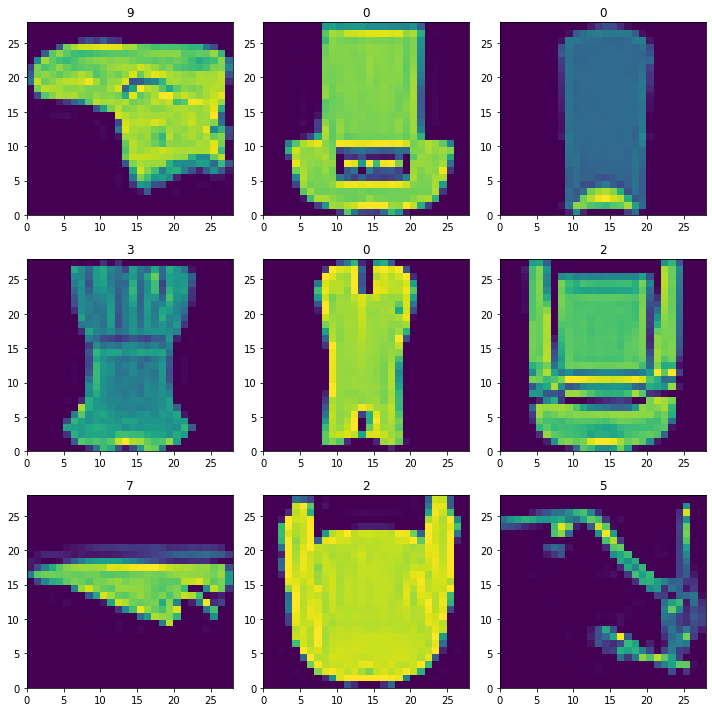

In [55]:
import matplotlib.pyplot as plt
fig, ax= plt.subplots(3,3, figsize=(10,10) )

for i,img in enumerate(ax.flatten()):
  img.pcolor(train_image[i])
  img.set_title(train_label[i])

plt.tight_layout()
# for img , axis in 
# plt.imshow(train_image[0])
# plt.show()



# plt.imshow(data, interpolation='nearest')
# plt.show()

In [193]:
model = keras.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation= 'relu', use_bias= True))
model.add(keras.layers.Dropout(rate= .2))
model.add(keras.layers.Dense(64, activation='relu', use_bias=True))
model.add(keras.layers.Dropout(rate= .2))
model.add(keras.layers.Dense(10, activation='softmax' ))

In [195]:
#creating a tensorboard object to be called while training the model
tensorboard = keras.callbacks.TensorBoard(log_dir='/content/drive/My Drive/CNN/logs', histogram_freq=1, batch_size=1000, write_grads=True, write_images=True )

/usr/local/lib/python3.6/dist-packages/keras/callbacks/tensorboard_v2.py:92: UserWarning: The TensorBoard callback `batch_size` argument (for histogram computation) is deprecated with TensorFlow 2.0. It will be ignored.
  warnings.warn('The TensorBoard callback `batch_size` argument '
/usr/local/lib/python3.6/dist-packages/keras/callbacks/tensorboard_v2.py:97: UserWarning: The TensorBoard callback does not support gradients display when using TensorFlow 2.0. The `write_grads` argument is ignored.
  warnings.warn('The TensorBoard callback does not support '


In [186]:
# %reload_ext tensorboard
# !rm -rf  '/content/drive/My Drive/CNN/logs' #to delete previous runs
# %tensorboard --logdir ='/content/drive/My Drive/CNN/logs'
# tensorboard = keras.callbacks.TensorBoard(log_dir='/content/drive/My Drive/CNN/logs')

In [194]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics= ['accuracy'])

In [196]:
model.fit(train_image, train_label, batch_size=1000, epochs = 24, validation_data=(test_image, test_label), callbacks=[tensorboard] )

Train on 60000 samples, validate on 10000 samples
Epoch 1/24
60000/60000 [==============================] - 2s 37us/step - loss: 0.8993 - accuracy: 0.6824 - val_loss: 0.5451 - val_accuracy: 0.8151
Epoch 2/24
60000/60000 [==============================] - 2s 27us/step - loss: 0.5324 - accuracy: 0.8156 - val_loss: 0.4557 - val_accuracy: 0.8432
Epoch 3/24
60000/60000 [==============================] - 2s 26us/step - loss: 0.4532 - accuracy: 0.8406 - val_loss: 0.4259 - val_accuracy: 0.8447
Epoch 4/24
60000/60000 [==============================] - 2s 28us/step - loss: 0.4132 - accuracy: 0.8542 - val_loss: 0.3961 - val_accuracy: 0.8590
Epoch 5/24
60000/60000 [==============================] - 2s 28us/step - loss: 0.3872 - accuracy: 0.8636 - val_loss: 0.3810 - val_accuracy: 0.8628
Epoch 6/24
60000/60000 [==============================] - 2s 27us/step - loss: 0.3673 - accuracy: 0.8701 - val_loss: 0.3669 - val_accuracy: 0.8680
Epoch 7/24
60000/60000 [==============================] - 2s 28us/st

In [197]:
%reload_ext tensorboard
!tensorboard dev upload --logdir '/content/drive/My Drive/CNN/logs' --name "Deep Learning : Tensorboard" --description "Modeling a very simple Image Classifier based on Fashion MNIST dataset " 

2020-07-25 10:53:53.870508: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Data for the "graphs" plugin is now uploaded to TensorBoard.dev! Note that uploaded data is public. If you do not want to upload data for this plugin, use the "--plugins" command line argument.
Data for the "histograms" plugin is now uploaded to TensorBoard.dev! Note that uploaded data is public. If you do not want to upload data for this plugin, use the "--plugins" command line argument.
Upload started and will continue reading any new data as it's added
to the logdir. To stop uploading, press Ctrl-C.
View your TensorBoard live at: https://tensorboard.dev/experiment/u6hGU2LaQqKn1b1udgL1RA/

exit

Upload stopped. View your TensorBoard at https://tensorboard.dev/experiment/u6hGU2LaQqKn1b1udgL1RA/


In [198]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)                650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
________________________________________________

In [199]:
model.predict(test_image[6].reshape(1,28,28))

array([[1.4427524e-06, 1.3813626e-07, 9.4744028e-04, 6.1016767e-06,
        9.9476236e-01, 7.6863799e-10, 4.2824424e-03, 5.9244015e-10,
        1.0315110e-07, 7.1654088e-10]], dtype=float32)

In [200]:
test_label[6]

4

In [ ]:
#operating on Single Image for prediction of its class

In [82]:
from keras.preprocessing import image

In [149]:
shoe = image.load_img('/content/drive/My Drive/tshirt.jpg', color_mode ='grayscale', target_size=(28,28) )

In [150]:
shoe = image.img_to_array(shoe)

In [151]:
shoe=shoe.reshape(28,28)

In [152]:
shoe = np.expand_dims(shoe, axis= 0)

In [153]:
model.predict(shoe)

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

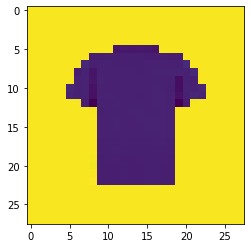

In [154]:
plt.imshow(shoe.reshape(28,28))

(array([6000., 6000., 6000., 6000., 6000., 6000., 6000., 6000., 6000.,
        6000.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

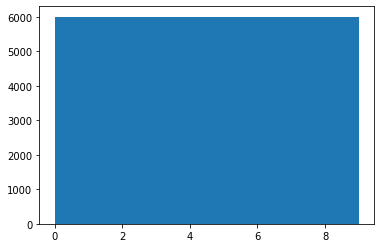

In [148]:
plt.hist(train_label, bins=10)